In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
da_HTS1 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018.csv", encoding = "cp949")
da_HTS2 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019.csv", encoding = "cp949")
da_HTS3 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020.csv", encoding = "cp949")
da_HTS4 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021.csv", encoding = "cp949")

da_schedule = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_경기일정_2021.csv", encoding = "cp949")

da_member1 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018.csv", encoding = "cp949")
da_member2 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019.csv", encoding = "cp949")
da_member3 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020.csv", encoding = "cp949")
da_member4 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021.csv", encoding = "cp949")

da_hit1 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018.csv", encoding = "cp949")
da_hit2 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019.csv", encoding = "cp949")
da_hit3 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020.csv", encoding = "cp949")
da_hit4 = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021.csv", encoding = "cp949")

da_team = pd.read_csv("2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀.csv", encoding = "cp949")

In [3]:
# for mapping PCODE and NAME
# beacause, at data_2018 
def makingdiction(Z, X):
    A = {}
    j = 0
    for i in Z:
        A[i] = X[j]
        j+=1
        
    return A

# 원하는 independent variables 만 뽑는 preprocessing

In [4]:
def preprocessing(da_HTS,da_member):
    data = da_HTS.iloc[:,6:9]
    data["PCODE"] = da_HTS["PCODE"]
    Z = makingdiction(da_member["PCODE"], da_member["NAME"])
    data["NAME"] = data["PCODE"].map(Z)
    return data

In [5]:
data_2018 = preprocessing(da_HTS1,da_member1)
data_2019 = preprocessing(da_HTS2,da_member2)
data_2020 = preprocessing(da_HTS3,da_member3)
data_2021 = preprocessing(da_HTS4,da_member4)

In [6]:
data_2018.head(5)

,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PCODE,NAME
0,131.50,42.7,플라이,62797,양성우
1,135.18,9.9,1루타,76753,송광민
2,152.41,2.1,1루타,71752,김태균
3,113.72,13.5,1루타,62700,하주석
4,54.11,16.4,번트안타,68730,호잉


# 시각화를 해주는 preprocessing


1. result 부분을 숫자화 해줄 필요가 있다.

    1루타 -> 1
    
    2루타 -> 2
    
    3루타 -> 3
    
    홈런  -> 4
    
    플라이, 땅볼아웃, 파올플라이, 병살타, 인필드플라이, 번트아웃, 야수선택, 삼중살타 -> -1
    
    번트안타, 직선타,희생번트, 내야안타(1루타), 희생플라이 -> 0
    
    
    
2. 1) 각, result 마다의 scatter plot을 통해 분포도 파악

   2) 다 합쳐서 처리
   
   3) 각 구간별로 갯수 파악

In [7]:
print(data_2018["HIT_RESULT"].unique())
print(data_2019["HIT_RESULT"].unique())
print(data_2020["HIT_RESULT"].unique())
print(data_2021["HIT_RESULT"].unique())


['플라이' '1루타' '번트안타' '땅볼아웃' '홈런' '2루타' '파울플라이' '3루타' '직선타' '희생번트'
 '내야안타(1루타)' '희생플라이' '병살타' '인필드플라이' '번트아웃' '야수선택']
['파울플라이' '1루타' '땅볼아웃' '플라이' '병살타' '2루타' '홈런' '직선타' '희생플라이' '내야안타(1루타)'
 '인필드플라이' '번트아웃' '3루타' '야수선택' '희생번트' '번트안타' '삼중살타']
['2루타' '플라이' '땅볼아웃' '1루타' '병살타' '파울플라이' '내야안타(1루타)' '직선타' '홈런' '희생플라이'
 '인필드플라이' '3루타' '야수선택' '삼중살타']
['땅볼아웃' '1루타' '2루타' '플라이' '병살타' '직선타' '홈런' '희생플라이' '파울플라이' '3루타'
 '내야안타(1루타)' '인필드플라이' '야수선택']


In [8]:
# mapping is needed because we have to analysis by numeric value.
object_num = {}
for i in data_2019["HIT_RESULT"].unique():
    
    if i == '1루타':
        object_num[i] = 1
    elif i == '2루타':
        object_num[i] = 2
    elif i == '3루타':
        object_num[i] = 3
    elif i == '홈런':
        object_num[i] = 4
        
    elif i in ["플라이","땅볼아웃", "파올플라이","병살타","인필드플라이","번트아웃","야수선택","삼중살타"]:
        object_num[i] = -1
    
    else:
        object_num[i] = 0

object_num

{'파울플라이': 0,
 '1루타': 1,
 '땅볼아웃': -1,
 '플라이': -1,
 '병살타': -1,
 '2루타': 2,
 '홈런': 4,
 '직선타': 0,
 '희생플라이': 0,
 '내야안타(1루타)': 0,
 '인필드플라이': -1,
 '번트아웃': -1,
 '3루타': 3,
 '야수선택': -1,
 '희생번트': 0,
 '번트안타': 0,
 '삼중살타': -1}

In [9]:
data_2018["HIT_RESULT"] = data_2018["HIT_RESULT"].map(object_num)
data_2019["HIT_RESULT"] = data_2019["HIT_RESULT"].map(object_num)
data_2020["HIT_RESULT"] = data_2020["HIT_RESULT"].map(object_num)
data_2021["HIT_RESULT"] = data_2021["HIT_RESULT"].map(object_num)

In [10]:
data_2019

,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PCODE,NAME
0,132.99,72.6,0,76753,송광민
1,146.08,4.7,1,68730,호잉
2,116.93,2.9,1,71752,김태균
3,135.10,-2.5,-1,73136,이성열
4,151.58,26.3,-1,79215,박건우
...,...,...,...,...,...
33245,131.58,29.2,2,68330,예진원
33246,149.25,4.2,0,65357,송성문
33247,124.14,-10.8,-1,64300,김하성
33248,110.58,41.8,-1,68518,정보근


In [11]:
def showing(data):

    data_minus = data[data["HIT_RESULT"] == -1]
    data_0     = data[data["HIT_RESULT"] ==  0]
    data_1     = data[data["HIT_RESULT"] ==  1]
    data_2     = data[data["HIT_RESULT"] ==  2]
    data_3     = data[data["HIT_RESULT"] ==  3]
    data_4     = data[data["HIT_RESULT"] ==  4]

    return data_minus, data_0, data_1, data_2, data_3, data_4

In [12]:
data_2018_minus, data_2018_0, data_2018_1, data_2018_2, data_2018_3, data_2018_4 = showing(data_2018)
data_2019_minus, data_2019_0, data_2019_1, data_2019_2, data_2019_3, data_2019_4 = showing(data_2019)
data_2020_minus, data_2020_0, data_2020_1, data_2020_2, data_2020_3, data_2020_4 = showing(data_2020)
data_2021_minus, data_2021_0, data_2021_1, data_2021_2, data_2021_3, data_2021_4 = showing(data_2021)

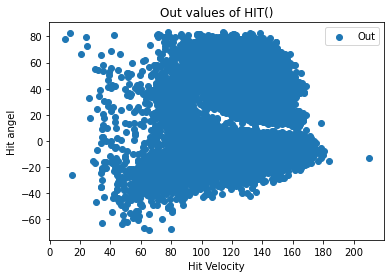

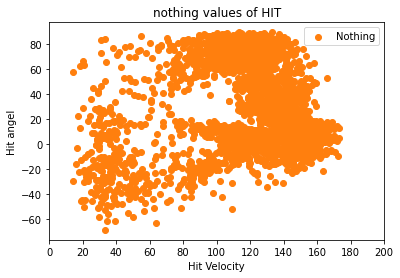

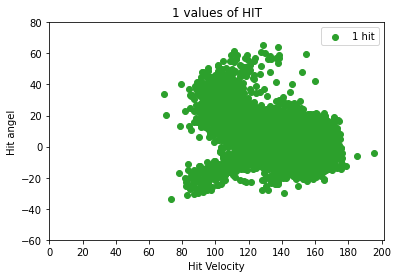

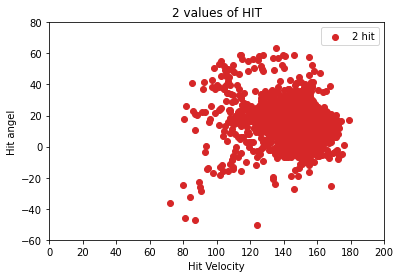

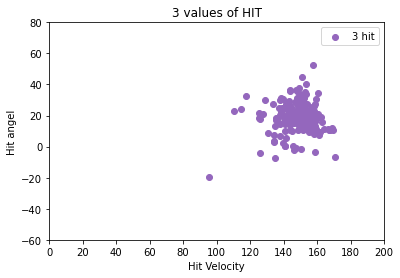

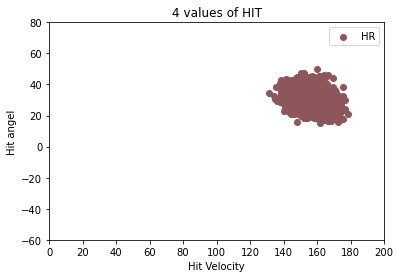

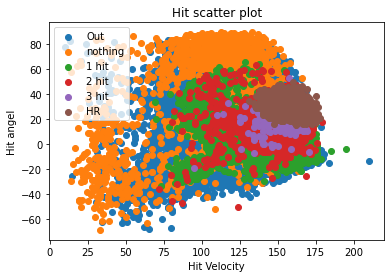

In [13]:


# each of scatter plot
plt.scatter(data_2018_minus["HIT_VEL"], data_2018_minus["HIT_ANG_VER"], color = '#1f77b4', label = "Out")
plt.title("Out values of HIT()")
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()
plt.savefig('2018_-1.png') 
plt.show()

plt.scatter(data_2018_0["HIT_VEL"], data_2018_0["HIT_ANG_VER"], color = '#ff7f0e', label = "Nothing")
plt.title("nothing values of HIT")
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()
plt.savefig('2018_0.png') 
plt.show()

plt.scatter(data_2018_1["HIT_VEL"], data_2018_1["HIT_ANG_VER"], color = '#2ca02c', label = "1 hit")
plt.title("1 values of HIT")
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()
plt.savefig('2018_1.png') 
plt.show()

plt.scatter(data_2018_2["HIT_VEL"], data_2018_2["HIT_ANG_VER"], color = '#d62728', label = "2 hit")
plt.title("2 values of HIT")
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()
plt.savefig('2018_2.png') 
plt.show()

plt.scatter(data_2018_3["HIT_VEL"], data_2018_3["HIT_ANG_VER"], color = "#9467bd", label = "3 hit")
plt.title("3 values of HIT")
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()
plt.savefig('2018_3.png') 
plt.show()

plt.scatter(data_2018_4["HIT_VEL"], data_2018_4["HIT_ANG_VER"], color = "#8c565b", label = "HR")
plt.title("4 values of HIT")
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()
plt.savefig('2018_4.png') 
plt.show()


# overlapping each other

plt.scatter(data_2018_minus["HIT_VEL"], data_2018_minus["HIT_ANG_VER"], label = "Out")
plt.scatter(data_2018_0["HIT_VEL"], data_2018_0["HIT_ANG_VER"], label  = "nothing")
plt.scatter(data_2018_1["HIT_VEL"], data_2018_1["HIT_ANG_VER"], label = "1 hit")
plt.scatter(data_2018_2["HIT_VEL"], data_2018_2["HIT_ANG_VER"], label = "2 hit")
plt.scatter(data_2018_3["HIT_VEL"], data_2018_3["HIT_ANG_VER"], label = "3 hit")
plt.scatter(data_2018_4["HIT_VEL"], data_2018_4["HIT_ANG_VER"], label = "HR")
plt.title("Hit scatter plot")
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.legend()
plt.savefig('2018_sum.png') 
plt.show()

# 연도별 차이를 봐보자!

차이가 없다면 우리는 하나만 가지고도 일반화가 가능하다

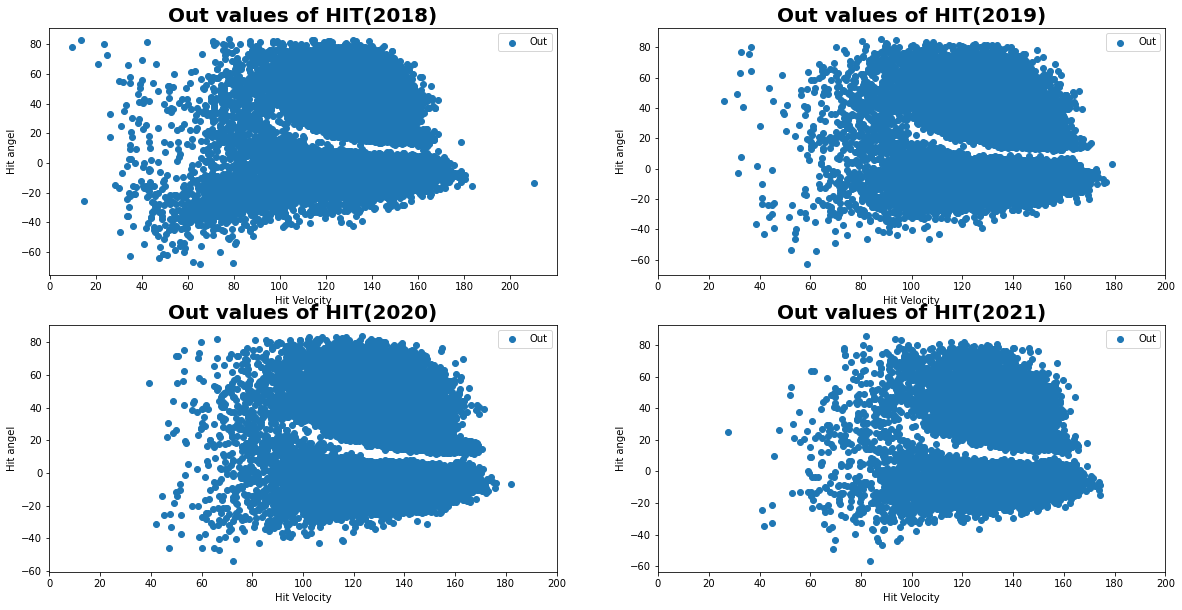

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.scatter(data_2018_minus["HIT_VEL"], data_2018_minus["HIT_ANG_VER"], color = '#1f77b4', label = "Out")
plt.title("Out values of HIT(2018)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()


plt.subplot(2,2,2)
plt.scatter(data_2019_minus["HIT_VEL"], data_2019_minus["HIT_ANG_VER"], color = '#1f77b4', label = "Out")
plt.title("Out values of HIT(2019)",fontsize = 20, fontweight = 'bold' )
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()

plt.subplot(2,2,3)
plt.scatter(data_2020_minus["HIT_VEL"], data_2020_minus["HIT_ANG_VER"], color = '#1f77b4', label = "Out")
plt.title("Out values of HIT(2020)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()

plt.subplot(2,2,4)
plt.scatter(data_2021_minus["HIT_VEL"], data_2021_minus["HIT_ANG_VER"], color = '#1f77b4', label = "Out")
plt.title("Out values of HIT(2021)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()
plt.savefig('out_dist.png') 
plt.show()


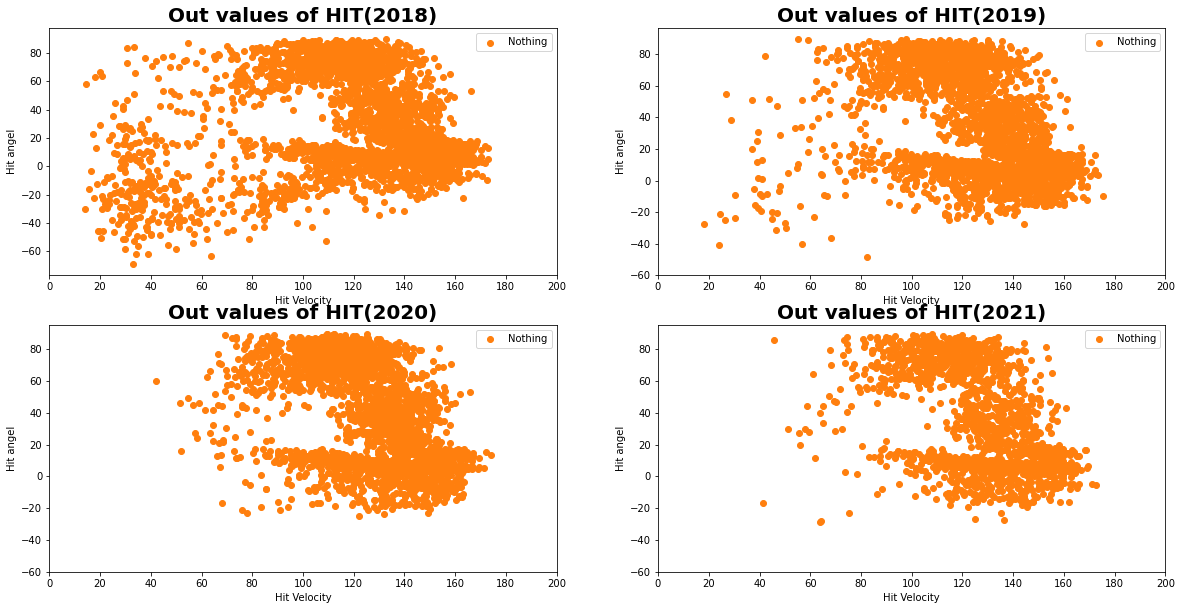

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.scatter(data_2018_0["HIT_VEL"], data_2018_0["HIT_ANG_VER"], color = '#ff7f0e', label = "Nothing")
plt.title("Out values of HIT(2018)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()


plt.subplot(2,2,2)
plt.scatter(data_2019_0["HIT_VEL"], data_2019_0["HIT_ANG_VER"], color = '#ff7f0e', label = "Nothing")
plt.title("Out values of HIT(2019)",fontsize = 20, fontweight = 'bold' )
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()

plt.subplot(2,2,3)
plt.scatter(data_2020_0["HIT_VEL"], data_2020_0["HIT_ANG_VER"], color = '#ff7f0e', label = "Nothing")
plt.title("Out values of HIT(2020)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()

plt.subplot(2,2,4)
plt.scatter(data_2021_0["HIT_VEL"], data_2021_0["HIT_ANG_VER"], color = '#ff7f0e', label = "Nothing")
plt.title("Out values of HIT(2021)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()
plt.savefig('nothing_dist.png')
plt.show()

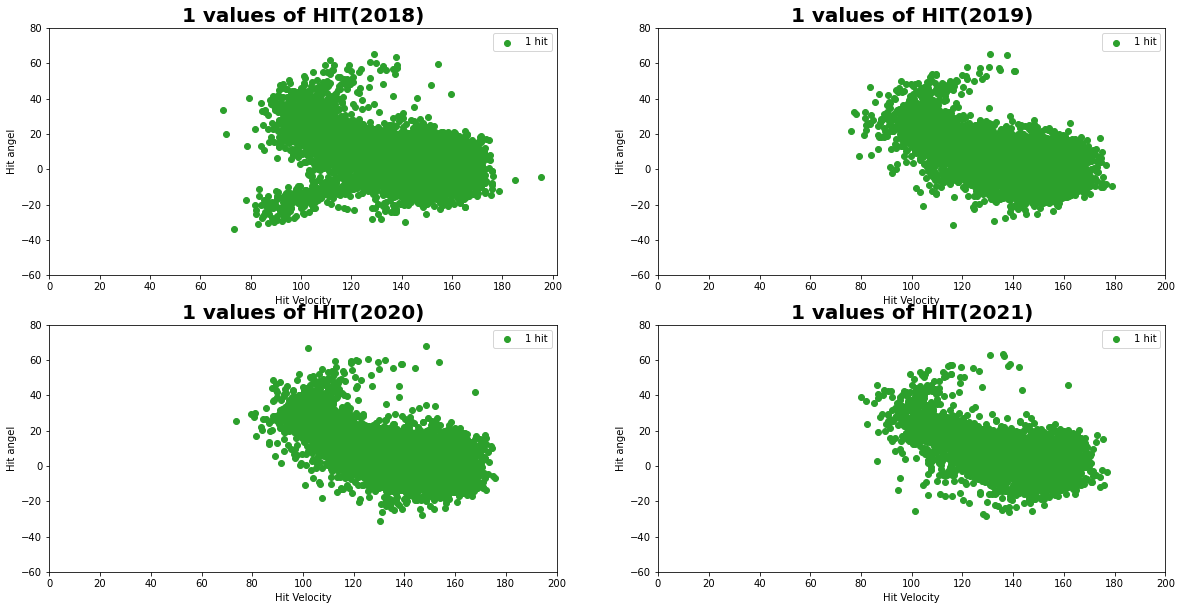

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.scatter(data_2018_1["HIT_VEL"], data_2018_1["HIT_ANG_VER"], color = '#2ca02c', label = "1 hit")
plt.title("1 values of HIT(2018)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()


plt.subplot(2,2,2)
plt.scatter(data_2019_1["HIT_VEL"], data_2019_1["HIT_ANG_VER"], color = '#2ca02c', label = "1 hit")
plt.title("1 values of HIT(2019)",fontsize = 20, fontweight = 'bold' )
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()

plt.subplot(2,2,3)
plt.scatter(data_2020_1["HIT_VEL"], data_2020_1["HIT_ANG_VER"], color = '#2ca02c', label = "1 hit")
plt.title("1 values of HIT(2020)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()

plt.subplot(2,2,4)
plt.scatter(data_2021_1["HIT_VEL"], data_2021_1["HIT_ANG_VER"], color = '#2ca02c', label = "1 hit")
plt.title("1 values of HIT(2021)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()
plt.savefig('1_dist.png')
plt.show()

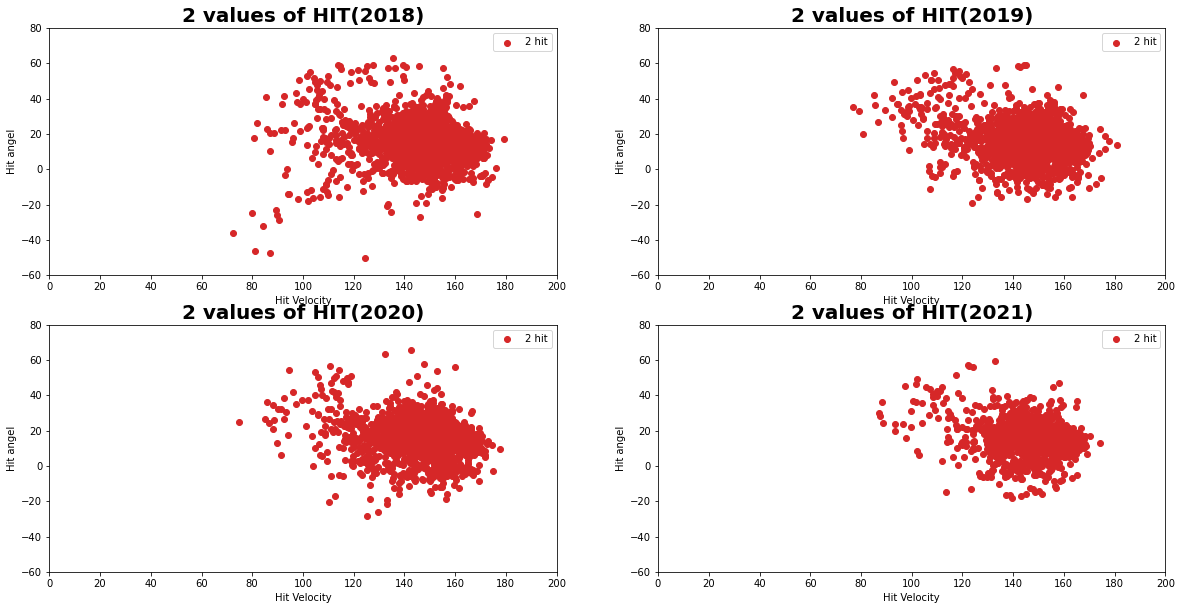

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.scatter(data_2018_2["HIT_VEL"], data_2018_2["HIT_ANG_VER"], color = '#d62728', label = "2 hit")
plt.title("2 values of HIT(2018)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()


plt.subplot(2,2,2)
plt.scatter(data_2019_2["HIT_VEL"], data_2019_2["HIT_ANG_VER"], color = '#d62728', label = "2 hit")
plt.title("2 values of HIT(2019)",fontsize = 20, fontweight = 'bold' )
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()

plt.subplot(2,2,3)
plt.scatter(data_2020_2["HIT_VEL"], data_2020_2["HIT_ANG_VER"], color = '#d62728', label = "2 hit")
plt.title("2 values of HIT(2020)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()

plt.subplot(2,2,4)
plt.scatter(data_2021_2["HIT_VEL"], data_2021_2["HIT_ANG_VER"], color = '#d62728', label = "2 hit")
plt.title("2 values of HIT(2021)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()
plt.savefig('2_dist.png')
plt.show()


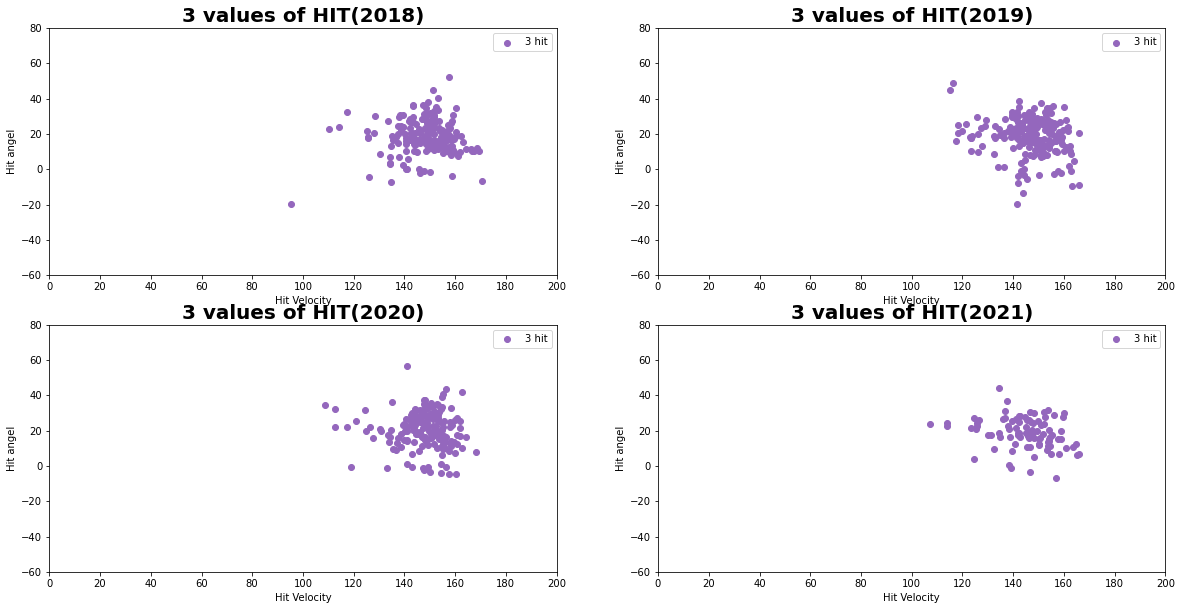

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.scatter(data_2018_3["HIT_VEL"], data_2018_3["HIT_ANG_VER"], color = "#9467bd", label = "3 hit")
plt.title("3 values of HIT(2018)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()


plt.subplot(2,2,2)
plt.scatter(data_2019_3["HIT_VEL"], data_2019_3["HIT_ANG_VER"], color = "#9467bd", label = "3 hit")
plt.title("3 values of HIT(2019)",fontsize = 20, fontweight = 'bold' )
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()

plt.subplot(2,2,3)
plt.scatter(data_2020_3["HIT_VEL"], data_2020_3["HIT_ANG_VER"], color = "#9467bd", label = "3 hit")
plt.title("3 values of HIT(2020)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()

plt.subplot(2,2,4)
plt.scatter(data_2021_3["HIT_VEL"], data_2021_3["HIT_ANG_VER"], color = "#9467bd", label = "3 hit")
plt.title("3 values of HIT(2021)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()
plt.savefig('3_dist.png')
plt.show()


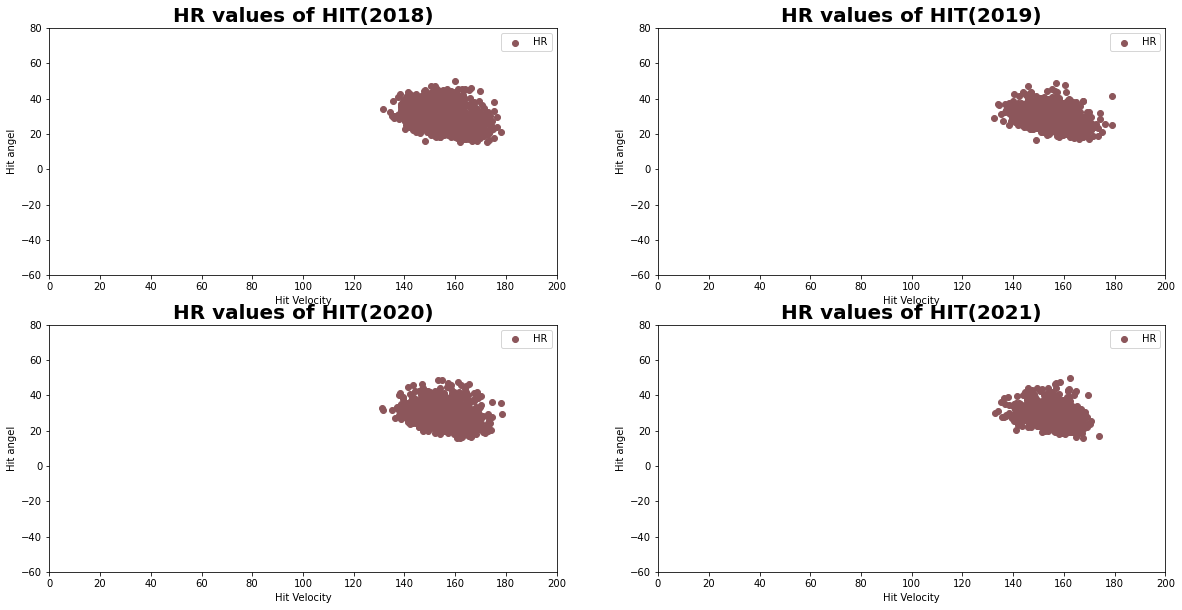

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.scatter(data_2018_4["HIT_VEL"], data_2018_4["HIT_ANG_VER"], color = "#8c565b", label = "HR")
plt.title("HR values of HIT(2018)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()


plt.subplot(2,2,2)
plt.scatter(data_2019_4["HIT_VEL"], data_2019_4["HIT_ANG_VER"], color = "#8c565b", label = "HR")
plt.title("HR values of HIT(2019)",fontsize = 20, fontweight = 'bold' )
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()

plt.subplot(2,2,3)
plt.scatter(data_2020_4["HIT_VEL"], data_2020_4["HIT_ANG_VER"], color = "#8c565b", label = "HR")
plt.title("HR values of HIT(2020)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()

plt.subplot(2,2,4)
plt.scatter(data_2021_4["HIT_VEL"], data_2021_4["HIT_ANG_VER"], color = "#8c565b", label = "HR")
plt.title("HR values of HIT(2021)", fontsize = 20, fontweight = 'bold')
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])
plt.yticks([-60,-40,-20,0,20,40,60,80])
plt.legend()
plt.savefig('HR_dist.png')
plt.show()


# 각 구간별 (타구 속도랑 각도) 갯수 비교 작업

In [20]:
data_2018_minus, data_2018_0, data_2018_1, data_2018_2, data_2018_3, data_2018_4 = showing(data_2018)
data_2019_minus, data_2019_0, data_2019_1, data_2019_2, data_2019_3, data_2019_4 = showing(data_2019)
data_2020_minus, data_2020_0, data_2020_1, data_2020_2, data_2020_3, data_2020_4 = showing(data_2020)
data_2021_minus, data_2021_0, data_2021_1, data_2021_2, data_2021_3, data_2021_4 = showing(data_2021)

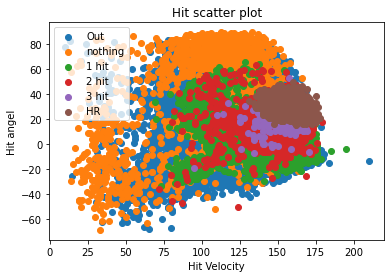

In [21]:
plt.scatter(data_2018_minus["HIT_VEL"], data_2018_minus["HIT_ANG_VER"], label = "Out")
plt.scatter(data_2018_0["HIT_VEL"], data_2018_0["HIT_ANG_VER"], label  = "nothing")
plt.scatter(data_2018_1["HIT_VEL"], data_2018_1["HIT_ANG_VER"], label = "1 hit")
plt.scatter(data_2018_2["HIT_VEL"], data_2018_2["HIT_ANG_VER"], label = "2 hit")
plt.scatter(data_2018_3["HIT_VEL"], data_2018_3["HIT_ANG_VER"], label = "3 hit")
plt.scatter(data_2018_4["HIT_VEL"], data_2018_4["HIT_ANG_VER"], label = "HR")
plt.title("Hit scatter plot")
plt.xlabel("Hit Velocity")
plt.ylabel("Hit angel")
plt.legend()
plt.show()

In [22]:
data_2018_minus

,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PCODE,NAME
0,131.50,42.7,-1,62797,양성우
6,105.03,0.9,-1,78756,오선진
7,115.52,26.6,-1,74163,이용규
9,127.35,61.1,-1,79365,박동원
10,63.08,-34.8,-1,62797,양성우
...,...,...,...,...,...
35020,151.08,26.2,-1,79215,박건우
35022,140.74,40.3,-1,71564,이대호
35023,107.08,-16.5,-1,77532,손아섭
35025,131.71,26.4,-1,68205,전민재


In [23]:
def making_bar(data_2018_minus,i,j):
    condition_x = (data_2018_minus["HIT_VEL"]> i) & (data_2018_minus["HIT_VEL"]<i+19.99999)
    condition_y = (data_2018_minus["HIT_ANG_VER"]>j) & (data_2018_minus["HIT_ANG_VER"]<j+19.99999)
    sns.barplot(x = A["HIT_RESULT"].value_counts().index, y = A["HIT_RESULT"].value_counts().values,)
    
    

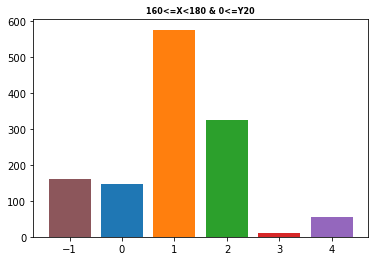

In [24]:
def making_bar1(data_2018,i,j):
    condition_x = (data_2018["HIT_VEL"]> i) & (data_2018["HIT_VEL"]<i+19.99999)
    condition_y = (data_2018["HIT_ANG_VER"]>j) & (data_2018["HIT_ANG_VER"]<j+19.99999)
    A = data_2018[condition_x & condition_y]
    plt.bar(x = A["HIT_RESULT"].value_counts(sort=False).index, height = A["HIT_RESULT"].value_counts(sort=False).values, 
           color = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', "#9467bd", "#8c565b"])
    plt.xticks([-1,0,1,2,3,4])
    plt.title("{}<=X<{}".format(i,i+20) + " & {}<=Y{}".format(j,j+20), fontsize = 8, fontweight = 'bold')
    

making_bar1(data_2018,160,0)

In [25]:
i = 100
j = 0
condition_x = (data_2018["HIT_VEL"]> i) & (data_2018["HIT_VEL"]<i+19.99999)
condition_y = (data_2018["HIT_ANG_VER"]>j) & (data_2018["HIT_ANG_VER"]<j+19.99999)
A = data_2018[condition_x & condition_y]
B = list(A["HIT_RESULT"].unique())
B.sort()

B

[-1, 0, 1, 2]

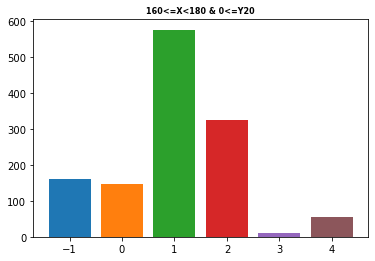

In [26]:
def making_bar1(data_2018,i,j):
    condition_x = (data_2018["HIT_VEL"]> i) & (data_2018["HIT_VEL"]<i+19.99999)
    condition_y = (data_2018["HIT_ANG_VER"]>j) & (data_2018["HIT_ANG_VER"]<j+19.99999)
    A = data_2018[condition_x & condition_y]
    B = list(A["HIT_RESULT"].unique())
    B.sort()
    plt.bar(x = A["HIT_RESULT"].value_counts()[B].index, height = A["HIT_RESULT"].value_counts()[B].values, 
           color = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', "#9467bd", "#8c565b"])
    plt.xticks([-1,0,1,2,3,4])
    
    plt.title("{}<=X<{}".format(i,i+20) + " & {}<=Y{}".format(j,j+20), fontsize = 8, fontweight = 'bold')
    

making_bar1(data_2018,160,0)

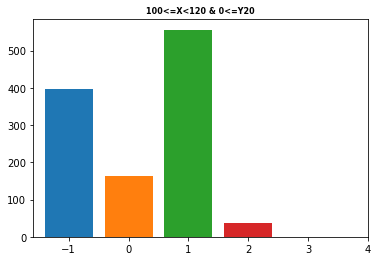

In [27]:
making_bar1(data_2018,100,0)

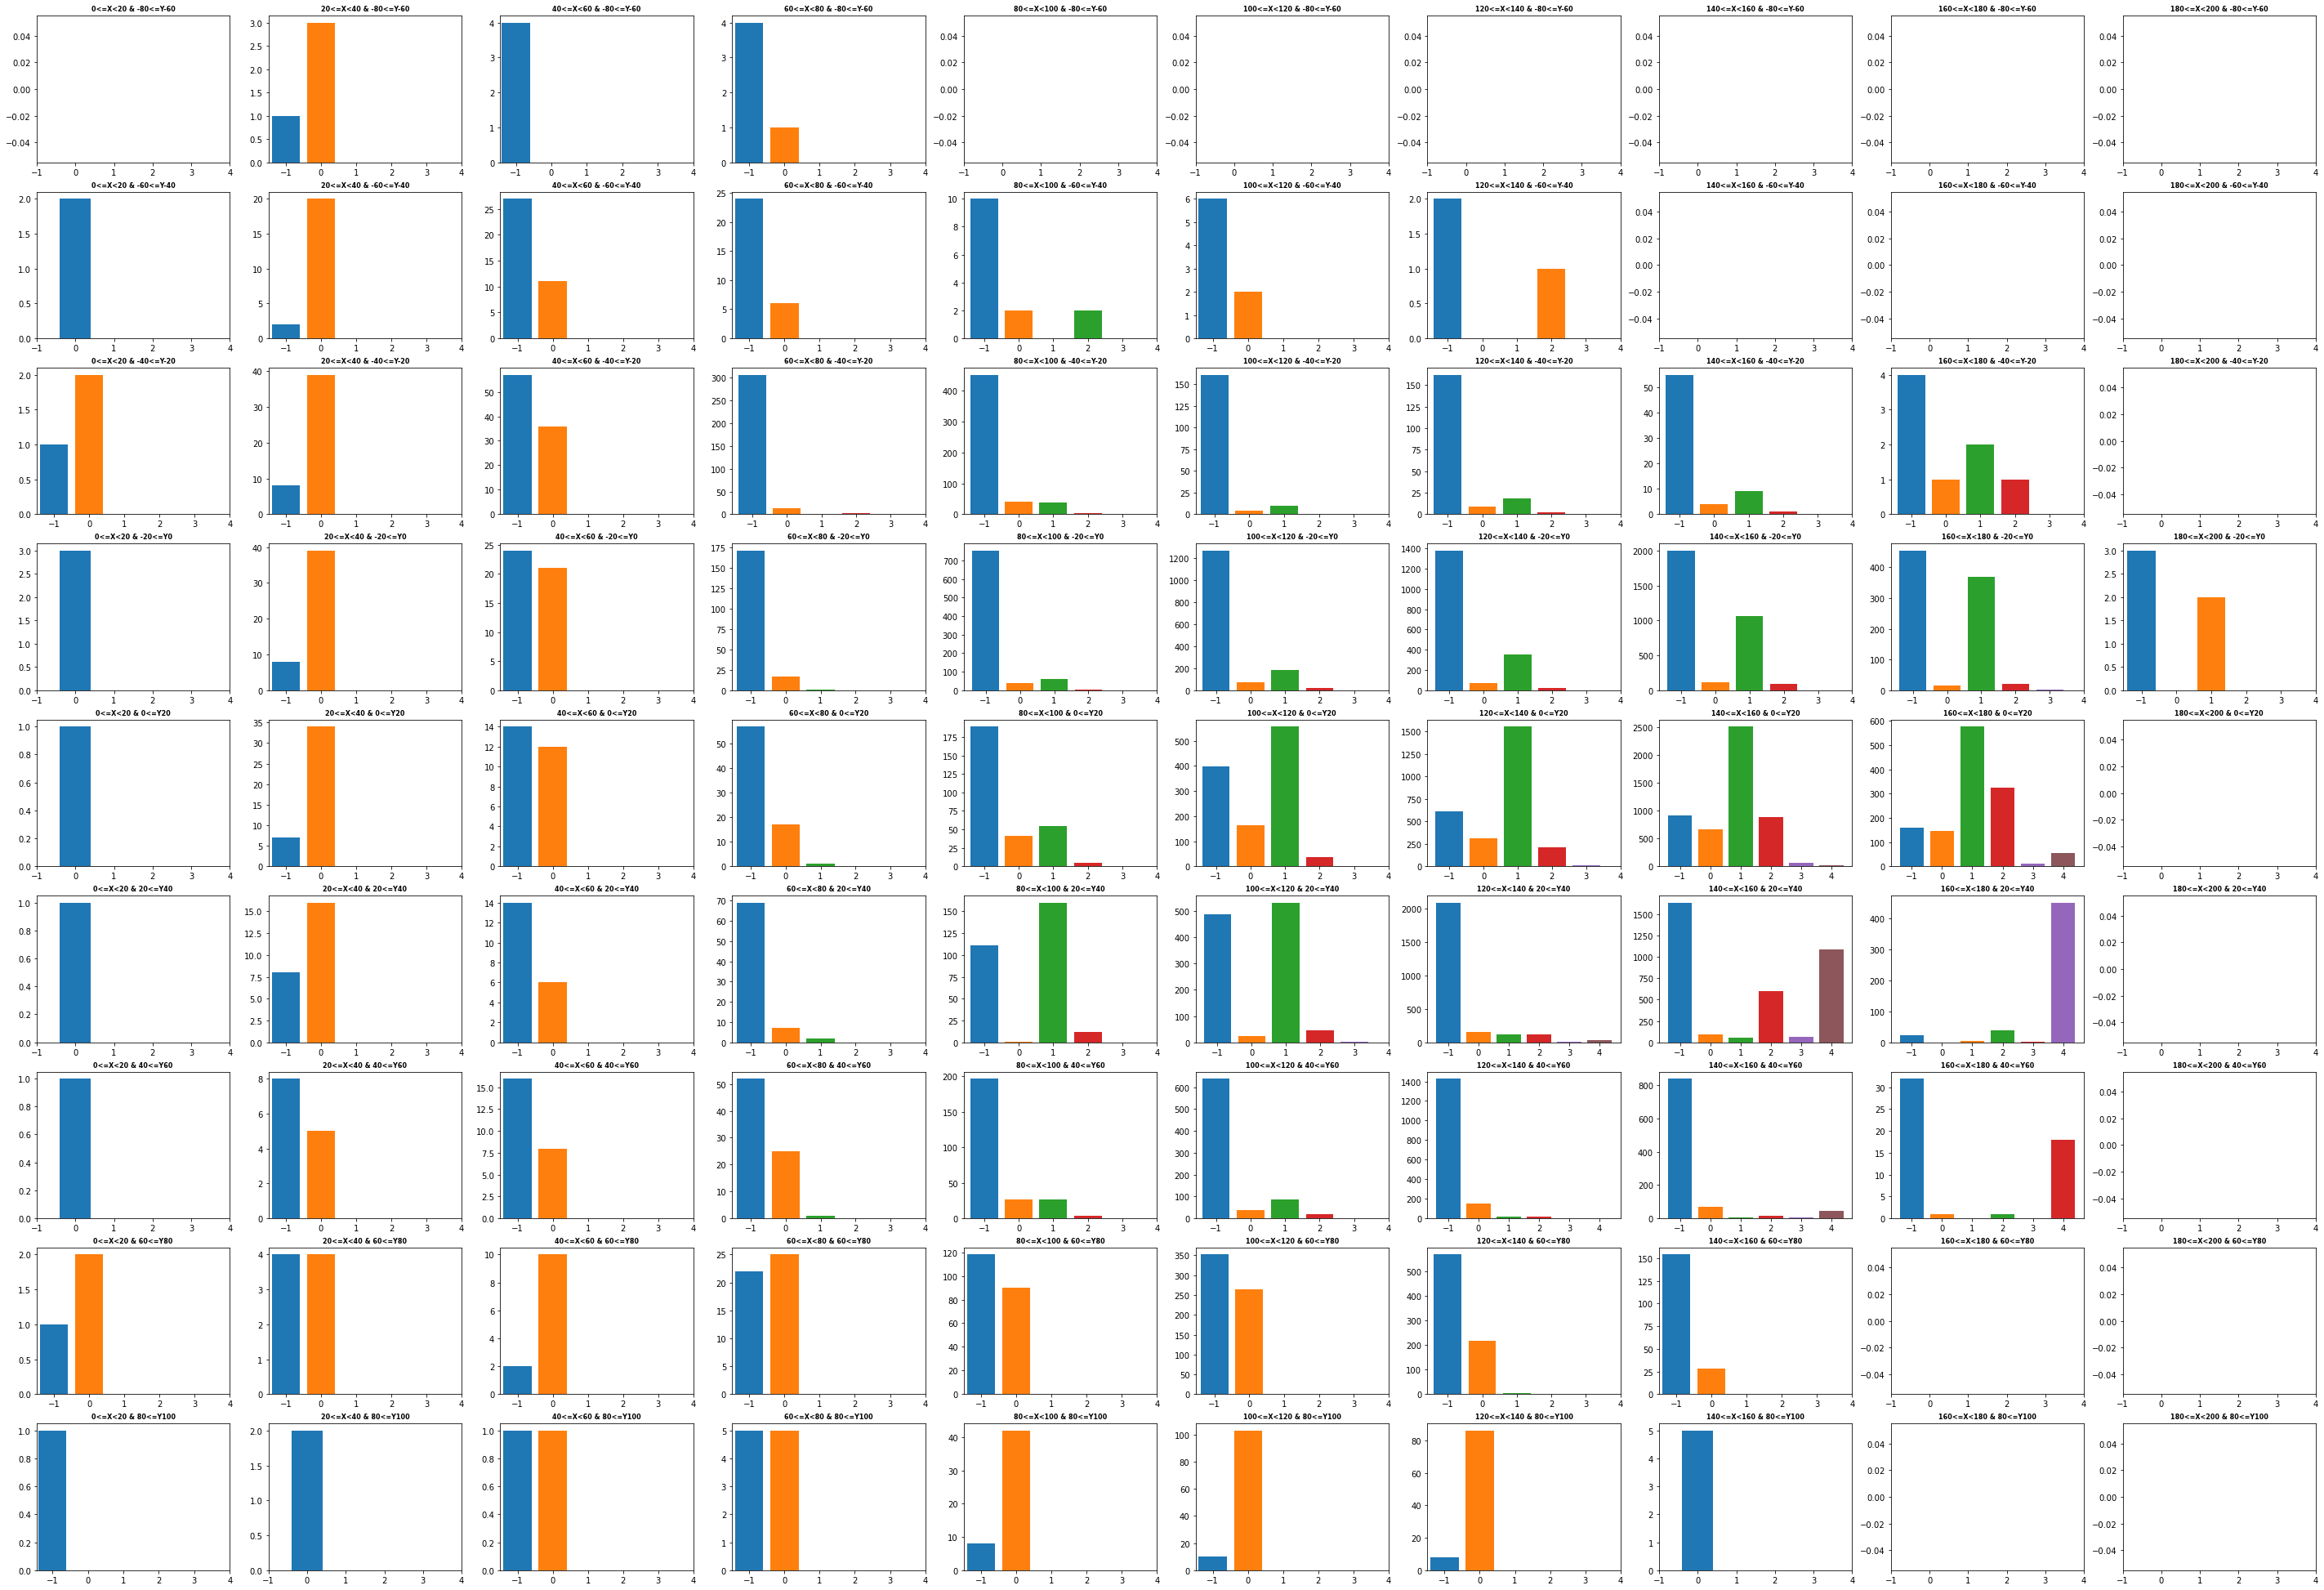

In [28]:
VEL_list = list(range(0,200,20))
ANGLE_list = list(range(-80,100,20))
plt.figure(figsize=(50,35))

k = 1
for i in ANGLE_list:
    for j in VEL_list:
       
        plt.subplot(len(ANGLE_list),len(VEL_list),k)
        making_bar1(data_2018,j,i)
        k +=1
        
plt.savefig('General.png')        

In [29]:
da_hit1

,GYEAR,PCODE,GAMENUM,PA,AB,BA,HIT,HR,TOTB,SLG,SF,BB,KK,IB,HP,GD
0,2018,60100,70,169,152,0.243,37,3,63,0.414,1,12,36,0,4,5
1,2018,60184,6,10,10,0.200,2,0,3,0.300,0,0,3,0,0,0
2,2018,60288,1,1,1,0.000,0,0,0,0.000,0,0,0,0,0,0
3,2018,60343,83,174,162,0.216,35,8,63,0.389,0,8,49,0,3,3
4,2018,60456,4,8,6,0.500,3,0,3,0.500,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2018,79530,21,15,14,0.286,4,0,6,0.429,0,1,5,0,0,1
271,2018,79608,130,549,494,0.342,169,23,278,0.563,9,36,57,1,10,13
272,2018,79705,58,102,85,0.259,22,4,39,0.459,0,11,26,0,3,3
273,2018,99606,88,205,183,0.295,54,4,77,0.421,1,16,49,1,5,5


([<matplotlib.axis.XTick at 0x1bc36b3b0a0>,
 <a list of 6 Text major ticklabel objects>)

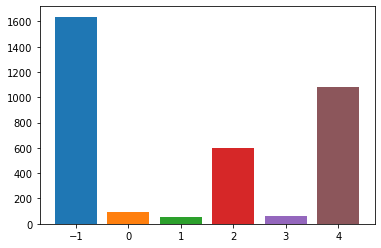

In [30]:
i = 140
j = 20
condition_x = (data_2018["HIT_VEL"]> i) & (data_2018["HIT_VEL"]<i+19.99999)
condition_y = (data_2018["HIT_ANG_VER"]>j) & (data_2018["HIT_ANG_VER"]<j+19.99999)
A = data_2018[condition_x & condition_y]
B = list(A["HIT_RESULT"].unique())
B.sort()
plt.bar(x = A["HIT_RESULT"].value_counts()[B].index, height = A["HIT_RESULT"].value_counts()[B].values, 
       color = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', "#9467bd", "#8c565b"])
plt.xticks([-1,0,1,2,3,4])

In [31]:
C = A["HIT_RESULT"].value_counts()[B]
C

-1    1637
 0      90
 1      55
 2     603
 3      61
 4    1085
Name: HIT_RESULT, dtype: int64

In [ ]:
C[4]

In [33]:
# 출루율 구하기
# 0인 경우는 제외 
denominator = C[-1] + C[1] +C[2]+ C[3]+ C[4]
numerator = C[1]+ C[2] + C[3]+ C[4]

print(numerator/denominator)

0.5242662016855565


In [34]:
# 장타율 구하기
# 0인 경우는 제외 
# 1루타* 확률 + 2루타*확률 + 3루타 * 확률 + 홈런 * 확률
denominator = C[-1] + C[1] +C[2]+ C[3]+ C[4]
prob_1 = C[1]/denominator
prob_2 = C[2]/denominator
prob_3 = C[3]/denominator
prob_4 = C[4]/denominator
Z = prob_1+ 2*prob_2 + 3*prob_3+ 4*prob_4

print(Z)

1.6809067131647777


In [38]:
data_2019[data_2019["NAME"] =="호잉"]
A = data_2019[data_2019["NAME"] =="호잉"]
A


,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PCODE,NAME
1,146.08,4.7,1,68730,호잉
21,164.56,-0.2,1,68730,호잉
40,147.71,7.6,1,68730,호잉
203,164.74,13.1,2,68730,호잉
214,137.24,20.4,-1,68730,호잉
...,...,...,...,...,...
28648,130.85,60.0,-1,68730,호잉
28883,133.88,47.3,-1,68730,호잉
28893,125.94,17.4,2,68730,호잉
29103,139.87,18.4,2,68730,호잉


In [47]:
A["HIT_RESULT"].value_counts()

-1    177
 1     76
 0     30
 2     24
 4     17
 3      2
Name: HIT_RESULT, dtype: int64

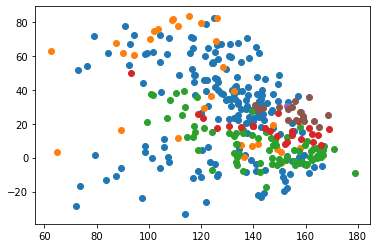

In [46]:
A_min1 = A[A["HIT_RESULT"] == -1]
A_0 = A[A["HIT_RESULT"] == 0]
A_1 = A[A["HIT_RESULT"] == 1]
A_2 = A[A["HIT_RESULT"] == 2]
A_3 = A[A["HIT_RESULT"] == 3]
A_4 = A[A["HIT_RESULT"] == 4]
plt.scatter(A_min1["HIT_VEL"], A_min1["HIT_ANG_VER"])
plt.scatter(A_0["HIT_VEL"], A_0["HIT_ANG_VER"])
plt.scatter(A_1["HIT_VEL"], A_1["HIT_ANG_VER"])
plt.scatter(A_2["HIT_VEL"], A_2["HIT_ANG_VER"])
plt.scatter(A_3["HIT_VEL"], A_3["HIT_ANG_VER"])
plt.scatter(A_4["HIT_VEL"], A_4["HIT_ANG_VER"])

In [49]:
A["HIT_RESULT_Estimated"] = 0
A

<ipython-input-49-ffa2c5b34ee9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A["HIT_RESULT_Estimated"] = 0


,HIT_VEL,HIT_ANG_VER,HIT_RESULT,PCODE,NAME,HIT_RESULT_Estimated
1,146.08,4.7,1,68730,호잉,0
21,164.56,-0.2,1,68730,호잉,0
40,147.71,7.6,1,68730,호잉,0
203,164.74,13.1,2,68730,호잉,0
214,137.24,20.4,-1,68730,호잉,0
...,...,...,...,...,...,...
28648,130.85,60.0,-1,68730,호잉,0
28883,133.88,47.3,-1,68730,호잉,0
28893,125.94,17.4,2,68730,호잉,0
29103,139.87,18.4,2,68730,호잉,0


In [ ]:
# 단순 평균으로 따지면 안되겠다. 라는 결론
# 어떻게 할지는 좀 더 고민해봐야겠다

## 시각화 자료 -> model로서 어떻게 바꿀지를 고민해보자!


# 기존의 linear regression (유명한 기법) x 
# 우리 스스로 확률적 근거의 모델을 세우는거야.


# 그러면 최대한/ 확률적 모델 세우는거 1차목표 (best) 
# linear regression 을 통해서 예측한 모델 이랑 비교하는 거 (시간 남으면)

## linear regression보다, 우리가 세운 모델이 더 우수하다 (더 정확하다) => 대상 

# 모델이 오래 걸린다.